In [1]:
#Import libraries
import numpy as np 
import pandas as pd 
import string
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
file_path = 'assets/text_train.txt'
def read_data(filepath):
    """reads given txt file into a pandas dataframe and returns it"""
    return pd.read_csv(file_path, sep='|', names=['label', 'message'])

df = read_data(file_path)

In [3]:
df.label.value_counts()

nl    535
en    534
Name: label, dtype: int64

In [ ]:
df.head(80)

In [ ]:
df.tail(10)

In [4]:
def clean_message(msg):
    """removes punctuation from given msg and returns a list of its words"""
    clean_msg = [word for word in msg if word not in string.punctuation]
    clean_msg = ''.join(clean_msg)
    clean_msg_arr = clean_msg.split(' ')
    return [x for x in clean_msg_arr if x.isalpha()]  # exclude numbers/symbols


In [5]:
df.message = df.message.apply(lambda txt: clean_message(txt))

In [6]:
print(f'Number of Dutch messages: {sum(df["label"] == "nl")}')
print(f'Number of English messages: {sum(df["label"] == "en")}')

Number of Dutch messages: 535
Number of English messages: 534


Plotting histogram of text length by text language...
Saved plot to txt_len_hist.png


<Figure size 432x288 with 0 Axes>

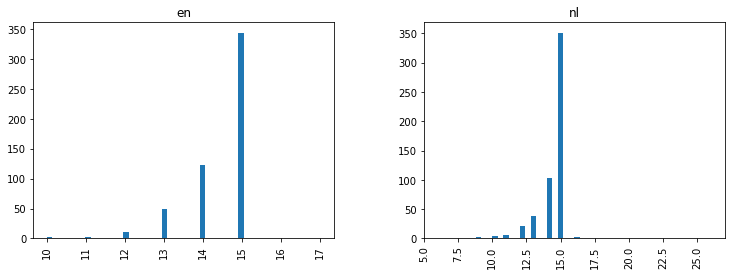

In [7]:
#generate word count (length) col
df['length'] = df['message'].apply(len)

# plots text length histogram
print('Plotting histogram of text length by text language...')
fig = plt.figure()
df.hist(column='length', by='label', bins=50, figsize=(12, 4))
plt.savefig('txt_len_hist.png')
print('Saved plot to txt_len_hist.png')

In [ ]:
df.head()

## Modeling

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix


def read_data(filename):
    """reads given txt file into a pandas dataframe and returns it"""
    return pd.read_csv(filename, sep='|', names=['label', 'message'])


def split_data(df):
    """
    splits data and returns training and testing sets for x and y
    return in the order of: x_train, x_test, y_train, y_test
    """
    feature, target = df['message'], df['label']
    return train_test_split(feature, target, test_size=0.2, random_state=42)

def predict_label(msg_arr, classifier, X_train, y_train):
    """
    Returns predictions on given array of messages
    Given classifier and training data
    """
    # passes a list of steps into sklearn pipeline
    pipeline = Pipeline([
        # vectorizes tokens into numerical data using bag-of-words model
        ('vectorizer', CountVectorizer(analyzer=clean_message)),
        
        # computes Term Frequency - Inverse Document Frequency
        ('tfidf', TfidfTransformer()),
        
        # trains the model with given classifier
        ('classifier', classifier())
    ])

    # applies all pipeline steps to the given datasets and returns predictions
    pipeline.fit(X_train, y_train)
    return pipeline.predict(msg_arr)


def output_results(y_test, predictions):
    """Outputs metrics to terminal based on given test data and predictions"""
    accuracy = accuracy_score(y_test, predictions)
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    print(f'Accuracy: {round(accuracy * 100, 2)}%')
    print(f'True Positives: {tp}')
    print(f'False Positives: {fp}')
    print(f'False Negatives: {fn}')
    print(f'True Negatives: {tn}')
    print(f'True Positive Rate: {tp / (tp + fn)}')
    print(f'True Negative Rate: {tn / (tn + fp)}')


In [9]:
if __name__ == '__main__':
    try:
        df = read_data('assets/text_train.txt')

        # splits data between train and test
        X_train, X_test, y_train, y_test = split_data(df)                      #call function

        
        # predicts with Naive Bayes classifier and output results to terminal
        nb_pred = predict_label(X_test, MultinomialNB, X_train, y_train)        #call function
        print('Results for Naive Bayes classifier:')
        output_results(y_test, nb_pred)                                         #call function

        print()

        # predicts with Random Forest classifier and output results to terminal
        rf_pred = predict_label(X_test, RandomForestClassifier,
                                X_train, y_train)
        print('Results for Random Forest classifier:')
        output_results(y_test, rf_pred)

    except Exception as e:
        print(f'could not execute script: {e}')


Results for Naive Bayes classifier:
Accuracy: 100.0%
True Positives: 114
False Positives: 0
False Negatives: 0
True Negatives: 100
True Positive Rate: 1.0
True Negative Rate: 1.0

Results for Random Forest classifier:
Accuracy: 100.0%
True Positives: 114
False Positives: 0
False Negatives: 0
True Negatives: 100
True Positive Rate: 1.0
True Negative Rate: 1.0


In [10]:
# initiate vectorizer

vectorizer = CountVectorizer()
vector = vectorizer.fit_transform(X_train)
# build the model - Naive Bayes classifier

clf = MultinomialNB()
clf.fit(vector, y_train)


MultinomialNB()

In [11]:
# make prediction
vector_test = vectorizer.transform(X_test)
y_pred1 = clf.predict(vector_test)

In [12]:
from sklearn import metrics
acc_score = metrics.accuracy_score(y_test, y_pred1)
print('Total accuracy classification score: {}'.format(acc_score))

Total accuracy classification score: 1.0


In [ ]:
# compare actual and predicted label
def Naive_Bayes_prediction(msg):
    msg = vectorizer.transform([msg])
    prediction = clf.predict(msg)
    return prediction[0]


for i in range(240,260,4):
    print(df['message'].iloc[i][:100], "...")
    print("Actual label: ", df['label'][i])
    print("predicted label: ", Naive_Bayes_prediction(df['message'][i]))

In [ ]:
Naive_Bayes_prediction('Wikipedia is een online encyclopedie die ernaar st')

In [ ]:
# initiate vectorizer

vectorizer2 = CountVectorizer()
vector2 = vectorizer.fit_transform(X_train)

RandomForestClassifier = MultinomialNB()
RandomForestClassifier.fit(vector, y_train)

def RandomForestClassifier_prediction(msg):
    
    msg = vectorizer2.transform([msg])
    
    prediction = RandomForestClassifier.predict(msg)
    return prediction[0]

In [ ]:
RandomForestClassifier_prediction('is het weer vandag goed? ')

In [ ]:
RandomForestClassifier_prediction('Is the weather today bad?')